In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.impute import KNNImputer

In [2]:
# Data info
meta_csv_df = pd.read_csv('data/metadata.csv')
meta_csv_df.set_index('Field')
meta_csv_df

,Field,Description
0,region_name,"Region name (census tract, zip code, city, cou..."
1,count_qualified,# of buildings in Google Maps that are suitabl...
2,percent_covered,% of buildings in Google Maps covered by Proje...
3,percent_qualified,% of buildings covered by Project Sunroof that...
4,yearly_sunlight_kwh_kw_threshold_avg,75% of the optimimum sunlight in the county co...
5,yearly_sunlight_kwh_total,total solar energy generation potential for al...
6,yearly_sunlight_kwh_f,total solar energy generation potential for fl...
7,yearly_sunlight_kwh_n,total solar energy generation potential for no...
8,yearly_sunlight_kwh_e,total solar energy generation potential for ea...
9,yearly_sunlight_kwh_s,total solar energy generation potential for so...


In [3]:
meta_csv_df.loc[30][1]

'# of buildings estimated to have a solar installation, at time of data collection'

In [4]:
# Load solar_data1
solar_data1 = pd.read_excel('data/solar_data_1.xlsx') # Load data
print(solar_data1.shape) #Examine the data's dimensions
solar_data1.tail() #Examine the top and bottom of the data

(21, 7)


,state_name,number_of_panels_total,kw_total,kw_median,yearly_sunlight_kwh_median,yearly_sunlight_kwh_total,existing_installs_count
16,Iowa,23041660,5760415.00,7.00,8292.486279,6.862786e+09,248.0
17,Kansas,26403168,6600792.00,8.25,10583.576611,8.588088e+09,NaN
18,Kentucky,35302639,8825659.75,7.75,9045.892059,1.052102e+10,707.0
19,Louisiana,60024259,15006064.75,11.00,14140.453491,1.951487e+10,8142.0
20,Maine,6252716,1563179.00,5.75,6562.470239,1.792813e+09,360.0


In [5]:
# Load solar_data2
solar_data2 = pd.read_excel('data/solar_data_2.xlsx') # Load data
print(solar_data2.shape) #Examine the data's dimensions
solar_data2.tail() #Examine the top and bottom of the data

(34, 7)


,state_name,number_of_panels_total,kw_total,kw_median,yearly_sunlight_kwh_median,yearly_sunlight_kwh_total,existing_installs_count
29,Wisconsin,63987980,15996995.00,7.50,8465.384497,1.841213e+10,1916
30,Wyoming,3249883,812470.75,7.75,10645.344800,1.108615e+09,29
31,Massachusetts,52098838,13024709.50,5.75,6571.621021,1.486191e+10,15331
32,Michigan,96360897,24090224.25,6.75,7350.628174,2.695720e+10,1727
33,Minnesota,51738380,12934595.00,7.00,7896.430273,1.481478e+10,1519


In [6]:
# Merge solar_data1 & solar_data2
solar_data = pd.concat([solar_data1, solar_data2])
solar_data.reset_index(inplace=True, drop=True)
print(solar_data.shape)

In [16]:
solar_data.info() #Examine the datatypes and missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55 entries, 0 to 54
Data columns (total 7 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   state_name                  54 non-null     object 
 1   number_of_panels_total      55 non-null     int64  
 2   kw_total                    55 non-null     float64
 3   kw_median                   54 non-null     float64
 4   yearly_sunlight_kwh_median  54 non-null     float64
 5   yearly_sunlight_kwh_total   55 non-null     float64
 6   existing_installs_count     54 non-null     float64
dtypes: float64(5), int64(1), object(1)
memory usage: 3.1+ KB


In [15]:
solar_data[solar_data.duplicated(keep=False)]

,state_name,number_of_panels_total,kw_total,kw_median,yearly_sunlight_kwh_median,yearly_sunlight_kwh_total,existing_installs_count
22,Massachusetts,52098838,13024709.50,5.75,6571.621021,1.486191e+10,15331.0
23,Michigan,96360897,24090224.25,6.75,7350.628174,2.695720e+10,1727.0
24,Minnesota,51738380,12934595.00,7.00,7896.430273,1.481478e+10,1519.0
52,Massachusetts,52098838,13024709.50,5.75,6571.621021,1.486191e+10,15331.0
53,Michigan,96360897,24090224.25,6.75,7350.628174,2.695720e+10,1727.0
54,Minnesota,51738380,12934595.00,7.00,7896.430273,1.481478e+10,1519.0


In [10]:
# Remove the duplicate values
unique_data = solar_data.drop_duplicates(keep='first', inplace = False)
unique_data.shape

(52, 7)

In [17]:
unique_data.isna().sum() #missing values

state_name                    1
number_of_panels_total        0
kw_total                      0
kw_median                     1
yearly_sunlight_kwh_median    1
yearly_sunlight_kwh_total     0
existing_installs_count       1
dtype: int64

In [18]:
unique_data.describe()

,number_of_panels_total,kw_total,kw_median,yearly_sunlight_kwh_median,yearly_sunlight_kwh_total,existing_installs_count
count,5.200000e+01,5.200000e+01,51.000000,51.000000,5.200000e+01,51.000000
mean,6.403502e+07,1.600876e+07,7.990196,10110.058732,2.089173e+10,13173.509804
std,9.276369e+07,2.319092e+07,1.986178,3422.336854,3.323686e+10,47843.193439
min,3.100000e+01,7.750000e+00,3.250000,5156.452783,1.243764e+04,0.000000
25%,1.465991e+07,3.664977e+06,6.750000,7429.007211,5.245807e+09,309.000000
50%,4.122448e+07,1.030612e+07,7.750000,9690.190088,1.288109e+10,1727.000000
75%,6.996107e+07,1.749027e+07,9.125000,11771.979956,2.069780e+10,5912.000000
max,5.310227e+08,1.327557e+08,13.000000,19004.649878,1.980163e+11,328899.000000


array([[<AxesSubplot: title={'center': 'number_of_panels_total'}>,
        <AxesSubplot: title={'center': 'kw_total'}>],
       [<AxesSubplot: title={'center': 'kw_median'}>,
        <AxesSubplot: title={'center': 'yearly_sunlight_kwh_median'}>],
       [<AxesSubplot: title={'center': 'yearly_sunlight_kwh_total'}>,
        <AxesSubplot: title={'center': 'existing_installs_count'}>]],
      dtype=object)

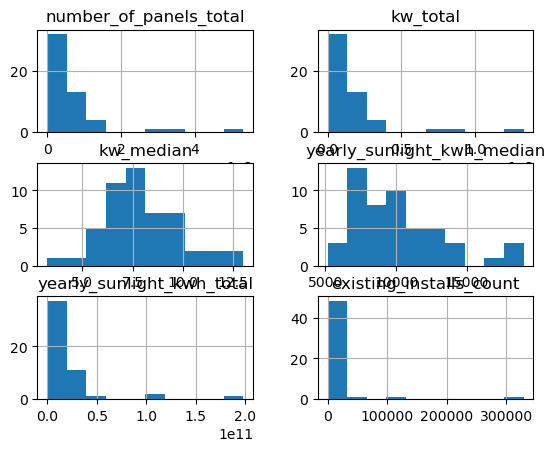

In [11]:
unique_data.hist()

In [12]:
unique_data.corr()

C:\Users\lenovo\AppData\Local\Temp\ipykernel_14572\877660171.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  unique_data.corr()


,number_of_panels_total,kw_total,kw_median,yearly_sunlight_kwh_median,yearly_sunlight_kwh_total,existing_installs_count
number_of_panels_total,1.000000,1.000000,0.306759,0.314965,0.995479,0.817110
kw_total,1.000000,1.000000,0.306759,0.314965,0.995479,0.817110
kw_median,0.306759,0.306759,1.000000,0.936857,0.328624,0.270983
yearly_sunlight_kwh_median,0.314965,0.314965,0.936857,1.000000,0.352959,0.327693
yearly_sunlight_kwh_total,0.995479,0.995479,0.328624,0.352959,1.000000,0.855156
existing_installs_count,0.817110,0.817110,0.270983,0.327693,0.855156,1.000000


<AxesSubplot: xlabel='yearly_sunlight_kwh_median', ylabel='existing_installs_count'>

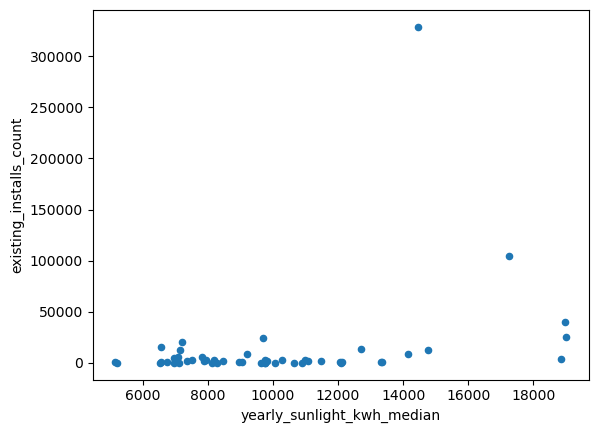

In [13]:
# it looks like the median kW is not correlated with the existing installs
unique_data.plot.scatter(x='yearly_sunlight_kwh_median', y='existing_installs_count')

In [14]:
# outliers
unique_data[unique_data['existing_installs_count']>50000]

,state_name,number_of_panels_total,kw_total,kw_median,yearly_sunlight_kwh_median,yearly_sunlight_kwh_total,existing_installs_count
5,California,531022657,1.327557e+08,9.75,14460.077979,1.980163e+11,328899.0
10,Florida,305682374,7.642059e+07,12.75,17250.183057,1.050627e+11,104123.0


In [21]:
# Fill the missing values now
imputer = KNNImputer(n_neighbors=2)
state_names = unique_data[['state_name']]  # indexing a single column with a list keeps it as a DataFrame instead of a Series
numeric_df = unique_data.drop('state_name', axis=1)
imputed = imputer.fit_transform(numeric_df)
numeric_df[numeric_df.columns] = imputed
unique_data = pd.concat([state_names, numeric_df], axis=1)

In [25]:
unique_data.isna().sum()

state_name                    1
number_of_panels_total        0
kw_total                      0
kw_median                     0
yearly_sunlight_kwh_median    0
yearly_sunlight_kwh_total     0
existing_installs_count       0
dtype: int64

In [27]:
unique_data.to_excel('data/cleaned_solar_data.xlsx', index=False)

Summary:

The data is very small, with each US state, DC, and one unknown location having data. Most of the data is left-skewed with some large outliers. A few large outliers are CA and FL, which have a lot of installed solar panels.
We also see some strong correlations between certain columns of data. For example, the yearly kW total, number of panels, and existing installs count were strongly correcated, the kWh and kW median columns were weakly correlated to everything else. Some duplicates were detected in the data and were removed, and some missing values filled in with KNN imputation. Then the data was saved to an Excel file for further use.